<a href="https://colab.research.google.com/github/deltorobarba/sciences/blob/master/chemistry_hydrogen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hydrogen molecule (H₂)**

In [ ]:
!pip install pyscf geometric -q
import numpy as np
import matplotlib.pyplot as plt
from pyscf import gto, scf, hessian, dft, tddft, mp, cc
from pyscf.geomopt.geometric_solver import optimize

In [ ]:
# Define molecule
mol = gto.Mole()
mol.atom = '''
    H  0.00 0.00  0.00
    H  0.00 0.00  0.74
'''

# Name
molecule = 'Hydrogen (H₂)'

In [ ]:
# Build molecule (with gto.M() function)
mol.atom = mol.atom
mol.basis = 'cc-pvdz' # Alternative basis set: sto-3g, cc-pvdz,6-31G
mol.build()

In [ ]:
# Ground State Energy with Hartree-Fock (Slater Determinant)
mf = scf.RHF(mol)
mf.kernel()

converged SCF energy = -1.12870009355644


np.float64(-1.1287000935564406)

converged SCF energy = -1.12870009355644


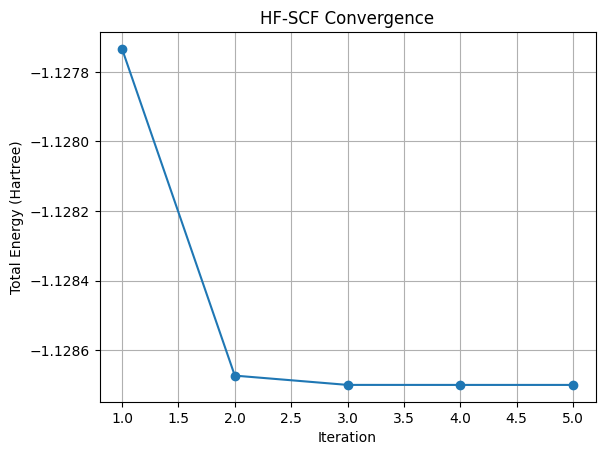

Ground state energy for Hydrogen (H₂): -1.128700093556442 Hartree


In [ ]:
# Visualization of calculation process (Hartree-Fock)
mf = scf.RHF(mol)                         # Set method
conv_data = []                            # Store convergence data
def callback(envs):                       # Callback function to collect convergence information
    conv_data.append(envs['e_tot'])       # Captures energy values at each iteration to track process
mf.callback = callback                    # Set callback directly on the mf object
energy = mf.kernel()                      # Perform HF calculation
energies = conv_data                      # Extract energy values
iterations = range(1, len(energies) + 1)  # Extract iteration numbers
plt.plot(iterations, energies, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Total Energy (Hartree)')
plt.title('HF-SCF Convergence')
plt.grid(True)
plt.show()
print(f"Ground state energy for {molecule}: {energy} Hartree")

In [ ]:
# Ground State Energy with DFT (Kohn-Sham)
mf = dft.RKS(mol)
mf.xc = 'B3LYP'    # Exchange-correlation functional
mf.kernel()

converged SCF energy = -1.17328112090857


np.float64(-1.1732811209085716)

In [ ]:
# Ground State Energy with Møller-Plesset Perturbation Theory (Post Hartree Fock)
mf = scf.RHF(mol)
mf.kernel()
mp2 = mp.MP2(mf) # MP2 single point energy calculation
energy_mp2 = mp2.kernel()
print(f"MP2 energy: {energy_mp2[0]} Hartree")

converged SCF energy = -1.12870009355644
E(MP2) = -1.15507165119134  E_corr = -0.0263715576348957
E(SCS-MP2) = -1.16034596271832  E_corr = -0.0316458691618748
MP2 energy: -0.02637155763489571 Hartree


In [ ]:
# Ground State Energy with Coupled Cluster (Post Hartree Fock)
mf = scf.RHF(mol)                  # Perform a HF-SCF calculation to obtain the reference wavefunction
hf_energy = mf.kernel()
ccsd_calc = cc.CCSD(mf)            # Perform a Coupled Cluster calculation
ccsd_energy = ccsd_calc.kernel()
ccsd_t_energy = ccsd_calc.ccsd_t() # (Optional) Include perturbative triple excitations (CCSD(T))

# Ensure that ccsd_t_energy is a scalar (take the first element if it's an array)
if isinstance(ccsd_t_energy, (list, tuple)) or hasattr(ccsd_t_energy, "__len__"):
    ccsd_t_energy = ccsd_t_energy[0]  # Take the first value if it returns multiple results

# Print the results
#print(f"HF-SCF energy: {hf_energy} Hartree")
#print(f"CCSD energy: {ccsd_energy} Hartree")
#print(f"CCSD(T) energy: {ccsd_energy + ccsd_t_energy} Hartree")

converged SCF energy = -1.12870009355644
E(CCSD) = -1.163374496404818  E_corr = -0.03467440284837713
CCSD(T) correction = -1.00253804690331e-19


In [ ]:
# Excited electronic states
myhf = scf.RHF(mol).run()     # Perform a ground-state calculation
mytd = tddft.TDA(myhf).run()  # Excited-state calculation using TDDFT
#mol = gto.M(verbose = 4)     # Add verbose for more details
mytd.analyze()

converged SCF energy = -1.12870009355644
Excited State energies (eV)
[14.07567057 21.45479287 32.30709355]

** Singlet excitation energies and oscillator strengths **
Excited State   1:     14.07567 eV     88.08 nm  f=0.6152
Excited State   2:     21.45479 eV     57.79 nm  f=0.0000
Excited State   3:     32.30709 eV     38.38 nm  f=0.2024


In [ ]:
# Geometry Optimization (in Angstroms) with HF or DFT
mol_eq = optimize(mf)
print(mol_eq.atom_coords())

geometric-optimize called with the following command line:
/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py -f /root/.local/share/jupyter/runtime/kernel-3f599ef5-8052-46a8-8edf-ffd02c650949.json

                                        ())))))))))))))))/                     
                                    ())))))))))))))))))))))))),                
                                *)))))))))))))))))))))))))))))))))             
                        #,    ()))))))))/                .)))))))))),          
                      #%%%%,  ())))))                        .))))))))*        
                      *%%%%%%,  ))              ..              ,))))))).      
                        *%%%%%%,         ***************/.        .)))))))     
                #%%/      (%%%%%%,    /*********************.       )))))))    
              .%%%%%%#      *%%%%%%,  *******/,     **********,      .))))))   
                .%%%%%%/      *%%%%%%,  **              ********    


Geometry optimization cycle 1
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H   0.000000   0.000000   0.000000    0.000000  0.000000  0.000000
   H   0.000000   0.000000   0.740000    0.000000  0.000000  0.000000
converged SCF energy = -1.17328112089116
--------------- RKS_Scanner gradients ---------------
         x                y                z
0 H     0.0000000000    -0.0000000000     0.0159964150
1 H    -0.0000000000     0.0000000000    -0.0159964150
----------------------------------------------
cycle 1: E = -1.17328112089  dE = -1.17328  norm(grad) = 0.0226223


Step    0 : Gradient = 1.600e-02/1.600e-02 (rms/max) Energy = -1.1732811209
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 5.00000e-02 5.00000e-02 3.91394e-01



Geometry optimization cycle 2
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H  -0.000000   0.000000  -0.010814   -0.000000  0.000000 -0.010814
   H   0.000000  -0.000000   0.750814    0.000000 -0.000000  0.010814
converged SCF energy = -1.17360206558998
--------------- RKS_Scanner gradients ---------------
         x                y                z
0 H     0.0000000000     0.0000000000     0.0000664006
1 H     0.0000000000    -0.0000000000    -0.0000664006
----------------------------------------------
cycle 2: E = -1.17360206559  dE = -0.000320945  norm(grad) = 9.39047e-05


Step    1 : Displace = 1.081e-02/1.081e-02 (rms/max) Trust = 1.000e-01 (=) Grad = 6.640e-05/6.640e-05 (rms/max) E (change) = -1.1736020656 (-3.209e-04) Quality = 0.982
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 5.00000e-02 5.00000e-02 3.89770e-01



Geometry optimization cycle 3
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H  -0.000000  -0.000000  -0.010859   -0.000000 -0.000000 -0.000045
   H   0.000000   0.000000   0.750859   -0.000000  0.000000  0.000045
converged SCF energy = -1.17360207162442
--------------- RKS_Scanner gradients ---------------
         x                y                z
0 H     0.0000000000     0.0000000000     0.0000045661
1 H    -0.0000000000     0.0000000000    -0.0000045661
----------------------------------------------
cycle 3: E = -1.17360207162  dE = -6.03444e-09  norm(grad) = 6.45747e-06


Step    2 : Displace = 4.507e-05/4.507e-05 (rms/max) Trust = 1.414e-01 (+) Grad = 4.566e-06/4.566e-06 (rms/max) E (change) = -1.1736020716 (-6.034e-09) Quality = 1.067
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 5.00000e-02 5.00000e-02 3.89770e-01
Converged! =D

    #==========================================================================#
    #| If this code has benefited your research, please support us by citing: |#
    #|                                                                        |#
    #| Wang, L.-P.; Song, C.C. (2016) "Geometry optimization made simple with |#
    #| translation and rotation coordinates", J. Chem, Phys. 144, 214108.     |#
    #| http://dx.doi.org/10.1063/1.4952956                                    |#
    #==========================================================================#
    Time elapsed since start of run_optimizer: 2.447 seconds


[[-1.21908345e-15 -1.67577959e-16 -2.05203498e-02]
 [ 7.36513360e-17  5.03596369e-16  1.41891768e+00]]


converged SCF energy = -1.12870009355644


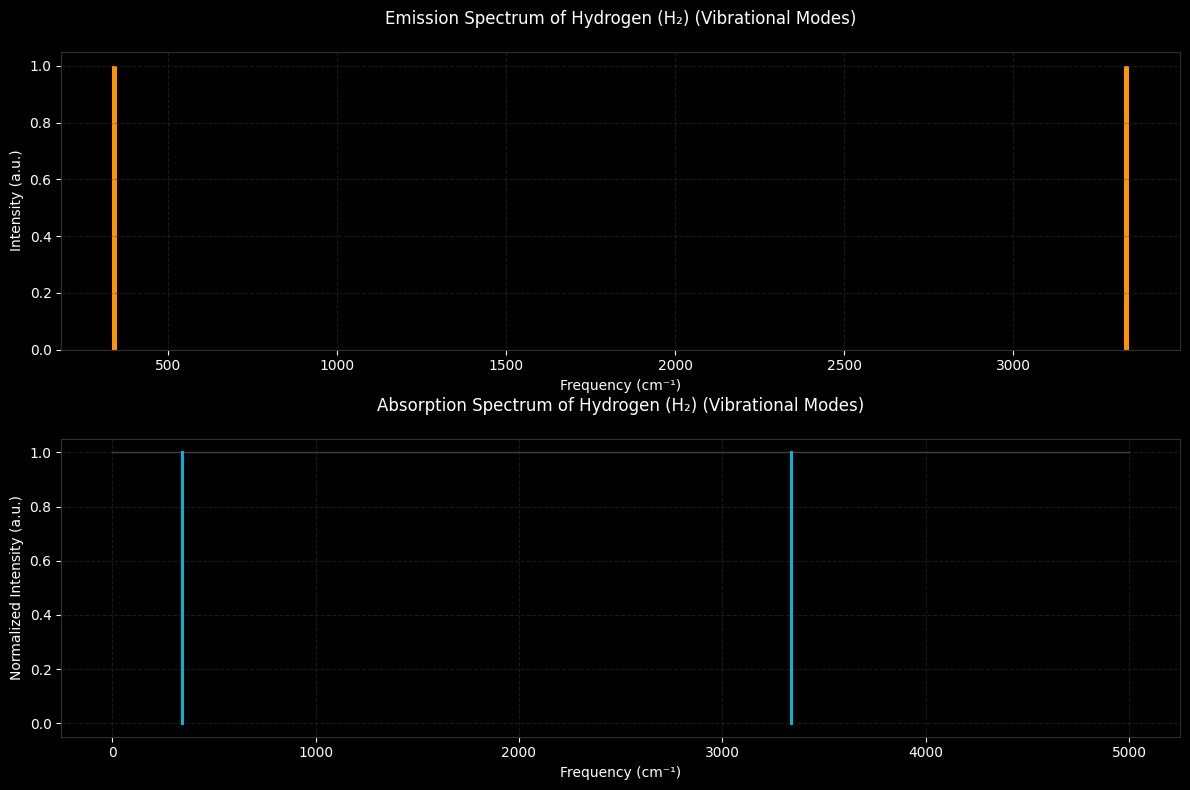

In [ ]:
# Emission and Absorption Spectra (Electronic Frequencies / Transitions)

mf = scf.RHF(mol)                                     # Perform a ground-state calculation for molecular vibrational frequencies
mf.kernel()
hess = hessian.RHF(mf).kernel()                       # Calculate the Hessian matrix (force constants)
frequencies = np.linalg.eigvalsh(hess)                # Diagonalize the Hessian to get vibrational frequencies
frequencies = np.sqrt(np.abs(frequencies)) * 5140.48  # Conversion factor to cm^-1 (more accurate)
frequencies = frequencies[(frequencies > 0) & (frequencies < 5000)]  # Filter out non-physical (imaginary) frequencies and limit to realistic range

# Plot stlyes
EMISSION_COLOR = '#ff9500'  # Bright orange
ABSORPTION_COLOR = '#00b4d8'  # Bright blue
BASELINE_COLOR = '#404040'  # Dark gray
GRID_COLOR = '#303030'  # Slightly lighter gray for grid
plt.figure(figsize=(12, 8), facecolor='black') # Create figure with dark background
plt.style.use('dark_background') # Set the style to dark background

# Emission Spectrum
plt.subplot(2, 1, 1)
plt.bar(frequencies, height=1.0, width=15.0, color=EMISSION_COLOR, alpha=0.8)
plt.xlabel('Frequency (cm⁻¹)', color='white', fontsize=10)
plt.ylabel('Intensity (a.u.)', color='white', fontsize=10)
plt.title(f'Emission Spectrum of {molecule} (Vibrational Modes)',
         color='white', pad=20, fontsize=12)

# Customize grid and spines
plt.grid(True, color=GRID_COLOR, linestyle='--', alpha=0.5)
for spine in plt.gca().spines.values():
    spine.set_color(GRID_COLOR)
plt.tick_params(colors='white')

# Absorption Spectrum
plt.subplot(2, 1, 2)
# Create baseline
plt.plot(np.linspace(0, 5000, 1000), np.ones(1000),
         color=BASELINE_COLOR, linewidth=1)

# Plot absorption lines with gradient effect
for freq in frequencies:
    y = np.linspace(0, 1, 100)
    x = np.ones_like(y) * freq
    plt.plot(x, y, color=ABSORPTION_COLOR,
            alpha=0.8, linewidth=2)

plt.xlabel('Frequency (cm⁻¹)', color='white', fontsize=10)
plt.ylabel('Normalized Intensity (a.u.)', color='white', fontsize=10)
plt.title(f'Absorption Spectrum of {molecule} (Vibrational Modes)',
         color='white', pad=20, fontsize=12)

# Customize grid and spines
plt.grid(True, color=GRID_COLOR, linestyle='--', alpha=0.5)
for spine in plt.gca().spines.values():
    spine.set_color(GRID_COLOR)
plt.tick_params(colors='white')

# Adjust layout and display
plt.tight_layout()
plt.subplots_adjust(hspace=0.3)

# Set figure background to black
plt.gcf().patch.set_facecolor('black')

plt.show()